In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import mediapipe as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, BatchNormalization,Bidirectional, LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Load CSV
df = pd.read_csv("../Datasets/CSV_DATASET/gait_keypoints.csv")

In [3]:
df

,K0_x,K0_y,K0_z,K0_visibility,K1_x,K1_y,K1_z,K1_visibility,K2_x,K2_y,...,K30_visibility,K31_x,K31_y,K31_z,K31_visibility,K32_x,K32_y,K32_z,K32_visibility,label
0,0.544438,0.311799,-0.491928,0.999985,0.550760,0.302966,-0.457777,0.999956,0.554709,0.302936,...,0.727806,0.558707,0.712873,0.147720,0.975578,0.469627,0.707786,0.103613,0.960170,0
1,0.544429,0.312831,-0.539714,0.999986,0.550742,0.303536,-0.507108,0.999956,0.554873,0.303603,...,0.736965,0.560770,0.713326,0.123384,0.975932,0.469267,0.707753,0.095728,0.961618,0
2,0.544420,0.313358,-0.536183,0.999986,0.550721,0.303807,-0.503395,0.999956,0.554974,0.303904,...,0.745172,0.562135,0.713639,0.126704,0.976206,0.468989,0.707734,0.086965,0.962904,0
3,0.544412,0.313716,-0.552992,0.999986,0.550704,0.304033,-0.519973,0.999957,0.555055,0.304152,...,0.752738,0.563478,0.714173,0.144464,0.976483,0.468926,0.707861,0.089896,0.964261,0
4,0.544409,0.313985,-0.541478,0.999986,0.550690,0.304216,-0.508349,0.999957,0.555118,0.304348,...,0.759676,0.563592,0.714303,0.138728,0.976682,0.467939,0.707868,0.091107,0.965331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,0.670237,-0.185817,0.010160,0.990551,0.637036,-0.201674,-0.102652,0.988985,0.622021,-0.201377,...,0.871135,0.461177,0.589925,1.202271,0.847898,0.703530,0.678279,1.041932,0.757861,4
1939,0.671349,-0.166190,-0.003337,0.991454,0.642305,-0.178645,-0.109127,0.990045,0.627943,-0.177255,...,0.877085,0.465175,0.596421,1.105750,0.846985,0.702633,0.673174,1.048200,0.760549,4
1940,0.655922,-0.165993,0.029245,0.992248,0.627492,-0.178381,-0.085604,0.990983,0.612966,-0.176982,...,0.883612,0.461193,0.599115,0.979052,0.845224,0.699980,0.670868,0.979459,0.766323,4
1941,0.618458,-0.155417,0.016472,0.992729,0.592696,-0.167426,-0.098251,0.991574,0.579236,-0.165696,...,0.889047,0.443759,0.592449,1.042519,0.840276,0.698442,0.672979,0.998246,0.769659,4


In [4]:
new_df = df

X = new_df.iloc[:, :-1].values  
y = new_df['label'].values      


# x= independent , y output
new_df_scaler = StandardScaler()     
X = new_df_scaler.fit_transform(X)


X = X.reshape(X.shape[0], 33, 4) 


num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)



New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.utils import to_categorical

# # Copy the original DataFrame
# new_df = df.copy()

# # Extract features (X) and labels (y)
# X = new_df.iloc[:, :-1].values  
# y = new_df['label'].values

# # One-hot encode labels
# num_classes = len(np.unique(y))
# y = to_categorical(y, num_classes)

# # Train-test split (stratify ensures balanced classes)
# New_X_train, New_X_test, New_y_train, New_y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # StandardScaler requires 2D input, so reshape X to (samples, features)
# new_df_scaler = StandardScaler()
# New_X_train = new_df_scaler.fit_transform(New_X_train)  
# New_X_test = new_df_scaler.transform(New_X_test)  # Use the same scaler for test data

# # Reshape back to (samples, 33, 4) - Correcting train & test shape mismatch
# New_X_train = New_X_train.reshape(New_X_train.shape[0], 33, 4)
# New_X_test = New_X_test.reshape(New_X_test.shape[0], 33, 4)


In [5]:
with open("../Models/scaler.pkl", "wb") as f:
    pickle.dump(new_df_scaler, f)

In [6]:
def create_CNN_LSTM_model(input_shape, num_classes):
    model = Sequential([
            Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
            BatchNormalization(),

            Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
            BatchNormalization(),

            Bidirectional(LSTM(128, return_sequences=False)),

            Dense(64, activation='relu'),
            Dropout(0.4),  
            Dense(num_classes, activation='softmax') 
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [7]:
def create_CNN_GRU_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        Bidirectional(GRU(128, return_sequences=False)),
        Dense(64, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [8]:
def create_RNN_model(input_shape, num_classes):
    model = Sequential([
        SimpleRNN(128, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dense, Dropout, LSTM, Input, Bidirectional, Reshape

def create_autoencoder(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    encoded = Bidirectional(LSTM(128, return_sequences=False))(x)
    
    x = Dense(128, activation='relu')(encoded)
    x = Dense(input_shape[0] * input_shape[1], activation='sigmoid')(x)
    decoded = Reshape((input_shape[0], input_shape[1]))(x)  # Fix applied here
    
    autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder, encoder

def create_classification_model(encoder, num_classes):
    inputs = encoder.input
    x = encoder.output
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

autoencoder, encoder = create_autoencoder((33, 4))
classification_model = create_classification_model(encoder, num_classes)


In [10]:
models = {
    'CNN_GRU': create_CNN_GRU_model((33, 4), num_classes),
    'RNN': create_RNN_model((33, 4), num_classes),
    'CNN_LSTM': create_CNN_LSTM_model((33, 4), num_classes),
    'Autoencoder_Classifier': classification_model
}

C:\Users\Pramod Rai\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Pramod Rai\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
import json
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Callbacks for better training
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint(f'../Models/{model_name}.h5', save_best_only=True)
    ]

    history = model.fit(New_X_train, New_y_train, epochs=15, batch_size=64, 
                        validation_data=(New_X_test, New_y_test), verbose=1, callbacks=callbacks)

    test_loss, test_acc = model.evaluate(New_X_test, New_y_test, verbose=1)
    print(f"{model_name} Test Accuracy: {test_acc:.4f}")

    # Save training history
    with open(f'../Models/{model_name}_history.json', 'w') as f:
        json.dump(history.history, f)

    results[model_name] = {
        'model': model,
        'history': history.history,  # Convert history to a dictionary
        'test_accuracy': test_acc
    }


Training CNN_GRU...
Epoch 1/15
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5121 - loss: 1.2393

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.5255 - loss: 1.2115 - val_accuracy: 0.7095 - val_loss: 1.1861
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8491 - loss: 0.4283

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8499 - loss: 0.4261 - val_accuracy: 0.6838 - val_loss: 1.0039
Epoch 3/15
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9110 - loss: 0.2646

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9116 - loss: 0.2629 - val_accuracy: 0.6195 - val_loss: 0.9490
Epoch 4/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9332 - loss: 0.1829

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9341 - loss: 0.1812 - val_accuracy: 0.6015 - val_loss: 0.9327
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9686 - loss: 0.1117 - val_accuracy: 0.5527 - val_loss: 1.0580
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9707 - loss: 0.1077 - val_accuracy: 0.6093 - val_loss: 1.1402
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9718 - loss: 0.0840 - val_accuracy: 0.6684 - val_loss: 0.9959
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5898 - loss: 0.9447
CNN_GRU Test Accuracy: 0.6015
Training RNN...
Epoch 1/15
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3391 - loss: 1.5164

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3621 - loss: 1.4821 - val_accuracy: 0.5501 - val_loss: 0.9770
Epoch 2/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6078 - loss: 0.9340

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6128 - loss: 0.9266 - val_accuracy: 0.6787 - val_loss: 0.7440
Epoch 3/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7011 - loss: 0.7281

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7050 - loss: 0.7261 - val_accuracy: 0.8355 - val_loss: 0.5766
Epoch 4/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8093 - loss: 0.5814

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8107 - loss: 0.5735 - val_accuracy: 0.8689 - val_loss: 0.3853
Epoch 5/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8598 - loss: 0.4704

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8600 - loss: 0.4649 - val_accuracy: 0.8740 - val_loss: 0.3571
Epoch 6/15
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8772 - loss: 0.3528

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8764 - loss: 0.3570 - val_accuracy: 0.8997 - val_loss: 0.3173
Epoch 7/15
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9128 - loss: 0.2925

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9134 - loss: 0.2896 - val_accuracy: 0.9152 - val_loss: 0.2912
Epoch 8/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9320 - loss: 0.2214

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9318 - loss: 0.2197 - val_accuracy: 0.9203 - val_loss: 0.2417
Epoch 9/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9209 - loss: 0.2305

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9214 - loss: 0.2281 - val_accuracy: 0.9306 - val_loss: 0.2195
Epoch 10/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9279 - loss: 0.2038

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9284 - loss: 0.2025 - val_accuracy: 0.9254 - val_loss: 0.2107
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9410 - loss: 0.1611 - val_accuracy: 0.9023 - val_loss: 0.2930
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9387 - loss: 0.2001 - val_accuracy: 0.9203 - val_loss: 0.2490
Epoch 13/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9553 - loss: 0.1497

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9554 - loss: 0.1475 - val_accuracy: 0.9512 - val_loss: 0.1461
Epoch 14/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9630 - loss: 0.1134

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9637 - loss: 0.1114 - val_accuracy: 0.9666 - val_loss: 0.1123
Epoch 15/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9737 - loss: 0.0892 - val_accuracy: 0.9640 - val_loss: 0.1247
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9668 - loss: 0.1096 
RNN Test Accuracy: 0.9666
Training CNN_LSTM...
Epoch 1/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5643 - loss: 1.1400

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5787 - loss: 1.1073 - val_accuracy: 0.7172 - val_loss: 1.1783
Epoch 2/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8505 - loss: 0.4314

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8533 - loss: 0.4233 - val_accuracy: 0.8226 - val_loss: 0.7985
Epoch 3/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9114 - loss: 0.2672

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9120 - loss: 0.2655 - val_accuracy: 0.8252 - val_loss: 0.6352
Epoch 4/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9290 - loss: 0.1870

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9300 - loss: 0.1855 - val_accuracy: 0.8021 - val_loss: 0.6251
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9539 - loss: 0.1372 - val_accuracy: 0.7275 - val_loss: 0.7283
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9758 - loss: 0.0855 - val_accuracy: 0.7635 - val_loss: 0.7556
Epoch 7/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9748 - loss: 0.0806

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9749 - loss: 0.0807 - val_accuracy: 0.8406 - val_loss: 0.5473
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9763 - loss: 0.0731 - val_accuracy: 0.7249 - val_loss: 0.8318
Epoch 9/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9864 - loss: 0.0446

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9865 - loss: 0.0448 - val_accuracy: 0.9075 - val_loss: 0.2948
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9926 - loss: 0.0305 - val_accuracy: 0.8560 - val_loss: 0.4762
Epoch 11/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9861 - loss: 0.0579

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9860 - loss: 0.0585 - val_accuracy: 0.9512 - val_loss: 0.1724
Epoch 12/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9913 - loss: 0.0399

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9915 - loss: 0.0390 - val_accuracy: 0.9409 - val_loss: 0.1255
Epoch 13/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9985 - loss: 0.0137

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9985 - loss: 0.0137 - val_accuracy: 0.9846 - val_loss: 0.0488
Epoch 14/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9868 - loss: 0.0368

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9868 - loss: 0.0367 - val_accuracy: 0.9897 - val_loss: 0.0233
Epoch 15/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9964 - loss: 0.0194

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9964 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0078
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0075
CNN_LSTM Test Accuracy: 1.0000
Training Autoencoder_Classifier...
Epoch 1/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5602 - loss: 1.1105

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5773 - loss: 1.0755 - val_accuracy: 0.6967 - val_loss: 1.0932
Epoch 2/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8711 - loss: 0.3502

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8724 - loss: 0.3469 - val_accuracy: 0.6967 - val_loss: 0.8671
Epoch 3/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9066 - loss: 0.2580

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9091 - loss: 0.2532 - val_accuracy: 0.6530 - val_loss: 0.8351
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9609 - loss: 0.1344 - val_accuracy: 0.5630 - val_loss: 1.0466
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9588 - loss: 0.1193 - val_accuracy: 0.5810 - val_loss: 1.0111
Epoch 6/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9709 - loss: 0.0895

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9711 - loss: 0.0888 - val_accuracy: 0.7789 - val_loss: 0.5930
Epoch 7/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9780 - loss: 0.0745

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9779 - loss: 0.0746 - val_accuracy: 0.8278 - val_loss: 0.3967
Epoch 8/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9885 - loss: 0.0407

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9880 - loss: 0.0415 - val_accuracy: 0.8869 - val_loss: 0.2873
Epoch 9/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9806 - loss: 0.0713

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9814 - loss: 0.0689 - val_accuracy: 0.9486 - val_loss: 0.1654
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9793 - loss: 0.0544 - val_accuracy: 0.9306 - val_loss: 0.1851
Epoch 11/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9913 - loss: 0.0309

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9912 - loss: 0.0309 - val_accuracy: 0.9769 - val_loss: 0.0853
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9895 - loss: 0.0344

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9871 - val_loss: 0.0516
Epoch 13/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9944 - loss: 0.0256

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9944 - loss: 0.0257 - val_accuracy: 0.9923 - val_loss: 0.0395
Epoch 14/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9936 - loss: 0.0171

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9937 - loss: 0.0170 - val_accuracy: 0.9923 - val_loss: 0.0189
Epoch 15/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9968 - loss: 0.0151

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9968 - loss: 0.0152 - val_accuracy: 0.9949 - val_loss: 0.0138
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9962 - loss: 0.0096
Autoencoder_Classifier Test Accuracy: 0.9949



Results for CNN_GRU:
Test Accuracy: 0.6015


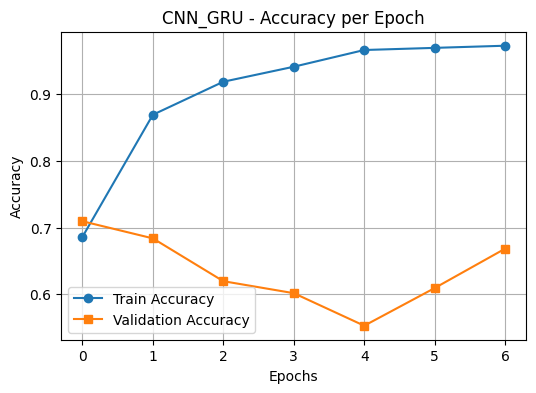

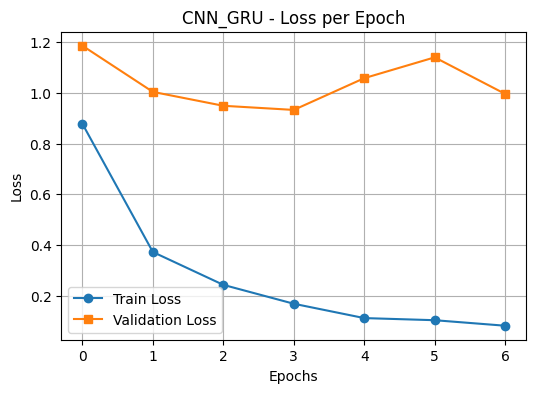


Results for RNN:
Test Accuracy: 0.9666


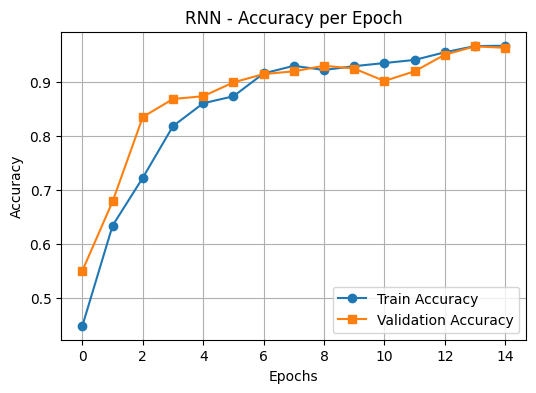

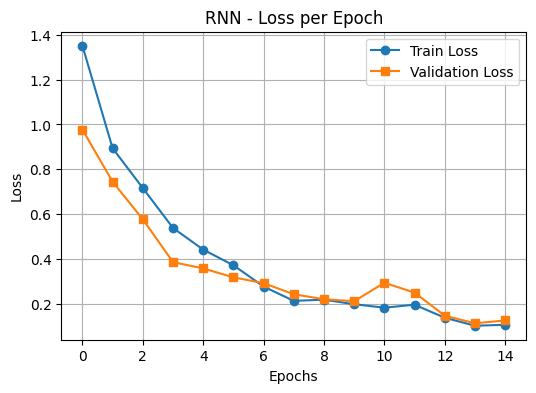


Results for CNN_LSTM:
Test Accuracy: 1.0000


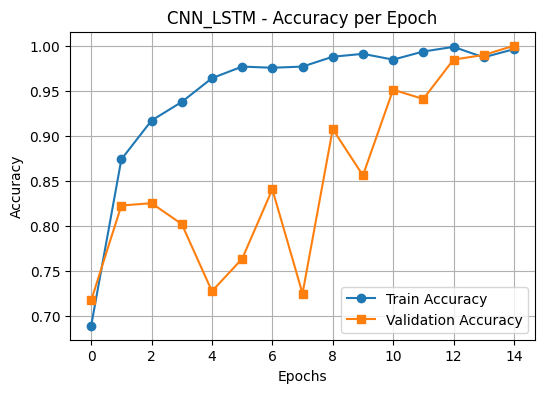

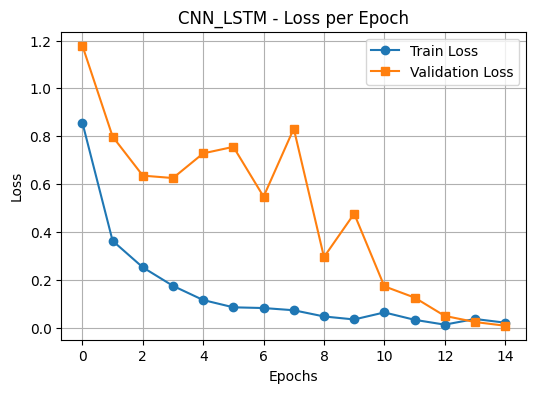


Results for Autoencoder_Classifier:
Test Accuracy: 0.9949


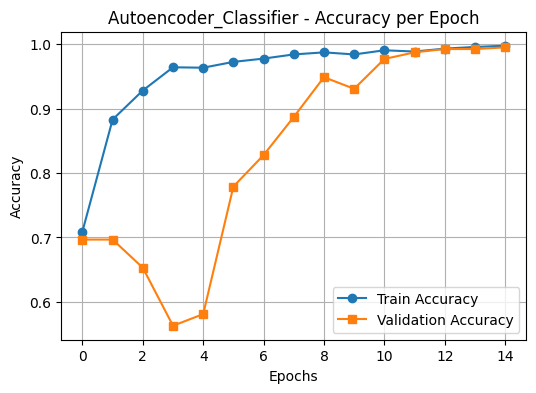

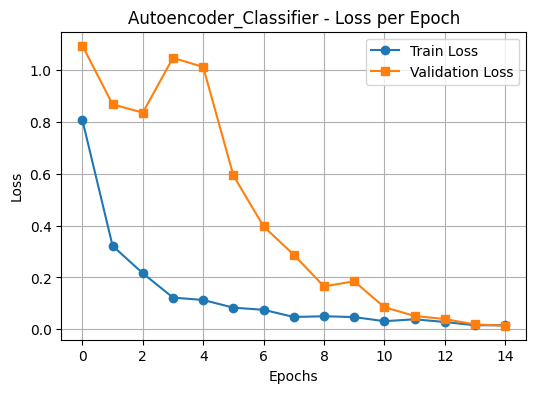

In [12]:
import matplotlib.pyplot as plt

for model_name, result in results.items():
    print(f"\nResults for {model_name}:")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    
    history = result['history']  # history is already a dictionary

    # Plot Training & Validation Accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Training & Validation Loss
    plt.figure(figsize=(6, 4))
    plt.plot(history['loss'], label='Train Loss', marker='o')
    plt.plot(history['val_loss'], label='Validation Loss', marker='s')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()


Loading and Evaluating CNN_GRU...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


C:\Users\Pramod Rai\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pramod Rai\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pramod Rai\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

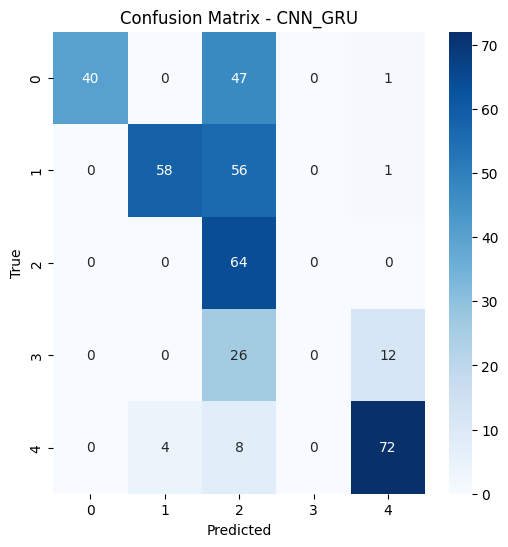

Classification Report for CNN_GRU:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        88
           1       0.94      0.50      0.66       115
           2       0.32      1.00      0.48        64
           3       0.00      0.00      0.00        38
           4       0.84      0.86      0.85        84

    accuracy                           0.60       389
   macro avg       0.62      0.56      0.52       389
weighted avg       0.74      0.60      0.60       389


Loading and Evaluating RNN...
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


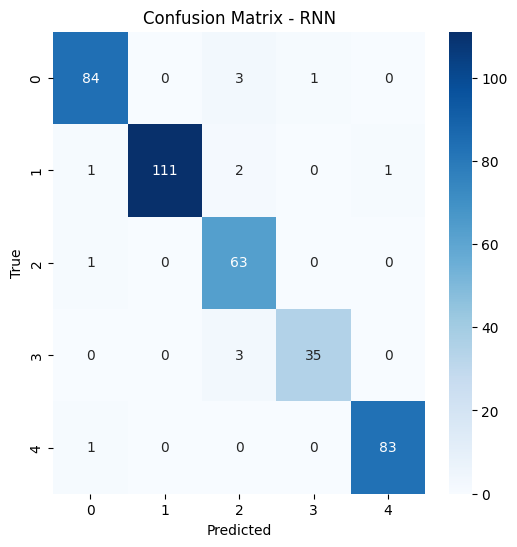

Classification Report for RNN:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        88
           1       1.00      0.97      0.98       115
           2       0.89      0.98      0.93        64
           3       0.97      0.92      0.95        38
           4       0.99      0.99      0.99        84

    accuracy                           0.97       389
   macro avg       0.96      0.96      0.96       389
weighted avg       0.97      0.97      0.97       389


Loading and Evaluating CNN_LSTM...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


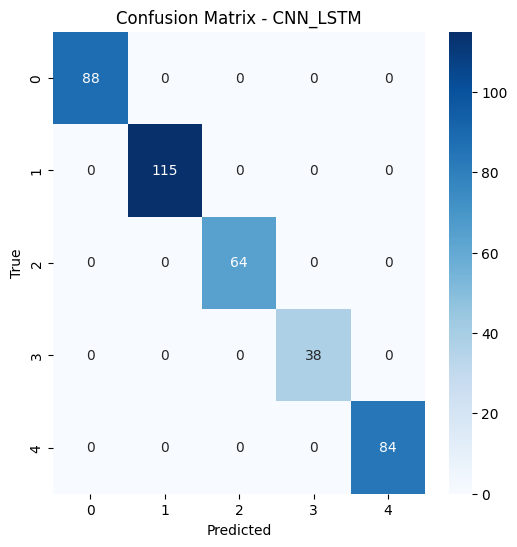

Classification Report for CNN_LSTM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        84

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389


Loading and Evaluating Autoencoder_Classifier...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


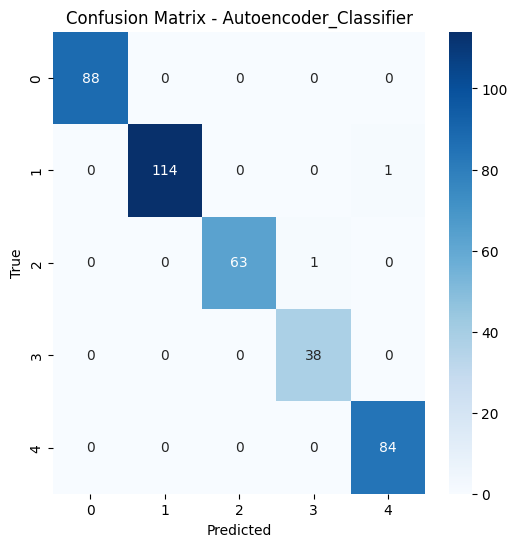

Classification Report for Autoencoder_Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      0.99      1.00       115
           2       1.00      0.98      0.99        64
           3       0.97      1.00      0.99        38
           4       0.99      1.00      0.99        84

    accuracy                           0.99       389
   macro avg       0.99      1.00      0.99       389
weighted avg       0.99      0.99      0.99       389




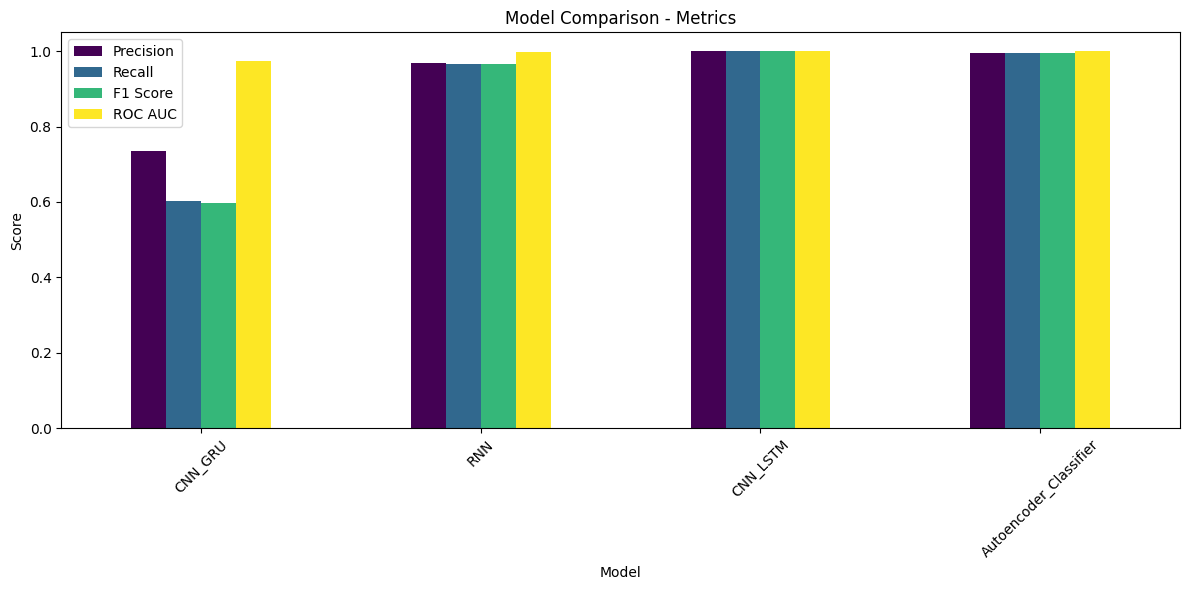

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score

# Function to evaluate each model and plot results
def evaluate_model(model, X_test, y_test, model_name, num_classes):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')
    
    class_report = classification_report(y_true, y_pred_classes)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return precision, recall, f1, roc_auc, class_report

# Function to plot model comparison metrics
def plot_comparison(metrics):
    metrics_df = pd.DataFrame(metrics).T
    metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
    plt.title('Model Comparison - Metrics')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Model file paths (Ensure these .h5 files exist)
models = {
    'CNN_GRU': '../Models/CNN_GRU.h5',
    'RNN': '../Models/RNN.h5',
    'CNN_LSTM': '../Models/CNN_LSTM.h5',
    'Autoencoder_Classifier': '../Models/Autoencoder_Classifier.h5'
}

# Ensure labels are correctly formatted
num_classes = 5  
if len(New_y_test.shape) > 1 and New_y_test.shape[1] == num_classes:
    y_test = New_y_test  # Already one-hot encoded
else:
    y_test = to_categorical(New_y_test, num_classes=num_classes)  # Convert labels to one-hot encoding

# Model evaluation
model_metrics = {}

for model_name, model_path in models.items():
    print(f"Loading and Evaluating {model_name}...")

    model = load_model(model_path)  # Load model using Keras

    precision, recall, f1, roc_auc, class_report = evaluate_model(model, New_X_test, y_test, model_name, num_classes)

    model_metrics[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    print(f"Classification Report for {model_name}:\n{class_report}\n")

# Plot the comparison of models
plot_comparison(model_metrics)


In [15]:
import pandas as pd
import cv2
import mediapipe as mp
import pickle
from sklearn.preprocessing import StandardScaler


In [26]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils  # For drawing keypoints
pose = mp_pose.Pose()




# List to store extracted keypoints for saving
keypoints_data = []

def visualize_pose(video_path, max_frames=200, save_csv=True):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("❌ Error: Video file not found or could not be opened.")
        return

    print("✅ Video opened successfully!")

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or frame_count >= max_frames:
            break

        # Convert to RGB and process with MediaPipe Pose
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            print(f"🟢 Frame {frame_count}: Keypoints detected!")

            # Extract and store keypoints
            row = [frame_count]  # Start with frame number
            h, w, _ = frame.shape  # Get frame size

            for i, landmark in enumerate(results.pose_landmarks.landmark):
                cx, cy = int(landmark.x * w), int(landmark.y * h)  # Convert to pixel coordinates
                print(f"  Keypoint {i}: x={landmark.x:.4f}, y={landmark.y:.4f}, z={landmark.z:.4f}, visibility={landmark.visibility:.4f}")
                
                # Store for CSV
                row.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
                
                # Overlay keypoint indices on the frame
                cv2.putText(frame, str(i), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 
                            0.5, (0, 255, 0), 2, cv2.LINE_AA)

            # Draw pose landmarks
            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Save keypoints data
            if save_csv:
                keypoints_data.append(row)

        else:
            print(f"🔴 Frame {frame_count}: No keypoints detected.")

        cv2.imshow("Pose Visualization", frame)
        frame_count += 1

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    print("✅ Video processing completed!")

    # Save keypoints to CSV
    if save_csv and keypoints_data:
        columns =["Frame"] + [f"K{i}_{c}" for i in range(33) for c in ("x", "y", "z", "visibility")]
        LR_test_keypoints = pd.DataFrame(keypoints_data, columns=columns)
        LR_test_keypoints.to_csv("../Datasets/CSV_DATASET/pose_keypoints.csv", index=False)
        print("📂 Keypoints saved to pose_keypoints.csv")

visualize_pose("../Datasets/Test_videos/chetna_no_arm_swing.mp4")


✅ Video opened successfully!
🟢 Frame 0: Keypoints detected!
  Keypoint 0: x=0.4289, y=0.1207, z=-0.3879, visibility=1.0000
  Keypoint 1: x=0.4514, y=0.1035, z=-0.4363, visibility=1.0000
  Keypoint 2: x=0.4604, y=0.1030, z=-0.4364, visibility=1.0000
  Keypoint 3: x=0.4700, y=0.1028, z=-0.4365, visibility=1.0000
  Keypoint 4: x=0.4389, y=0.1036, z=-0.3618, visibility=1.0000
  Keypoint 5: x=0.4384, y=0.1031, z=-0.3618, visibility=1.0000
  Keypoint 6: x=0.4380, y=0.1025, z=-0.3620, visibility=1.0000
  Keypoint 7: x=0.5140, y=0.1097, z=-0.5342, visibility=1.0000
  Keypoint 8: x=0.4855, y=0.1085, z=-0.2133, visibility=1.0000
  Keypoint 9: x=0.4506, y=0.1396, z=-0.4152, visibility=1.0000
  Keypoint 10: x=0.4370, y=0.1393, z=-0.3213, visibility=1.0000
  Keypoint 11: x=0.5885, y=0.2104, z=-0.6751, visibility=1.0000
  Keypoint 12: x=0.5302, y=0.2193, z=0.0660, visibility=0.9994
  Keypoint 13: x=0.5575, y=0.3730, z=-0.6524, visibility=0.9962
  Keypoint 14: x=0.5153, y=0.3602, z=0.1870, visibility

In [17]:
keypoints = pd.read_csv('../Datasets/CSV_DATASET/pose_keypoints.csv')

In [18]:
import pickle
# Load the scaler
with open("../Models/scaler.pkl", "rb") as f:
    new_df_scaler = pickle.load(f)

In [19]:
new_keypoints = keypoints.copy()
new_keypoints.drop("Frame", axis=1, inplace=True)

# Scale keypoints
new_keypoints = new_df_scaler.transform(new_keypoints)

# Reshape for CNN input
new_keypoints = new_keypoints.reshape(new_keypoints.shape[0], 33, 4)  # Ensure correct shape
print(f"✅ Extracted keypoints shape: {new_keypoints.shape}")
print(f"🔹 Sample keypoints (first frame):\n{new_keypoints[0]}")

✅ Extracted keypoints shape: (200, 33, 4)
🔹 Sample keypoints (first frame):
[[ 5.90090941e-01  1.12430442e-02 -5.30634200e-01  3.70109307e-01]
 [ 6.23729345e-01 -2.36117803e-03 -4.84972447e-01  3.98413718e-01]
 [ 6.42933494e-01 -1.19995720e-03 -4.85080033e-01  4.26720487e-01]
 [ 6.62230998e-01  1.36094422e-03 -4.85279822e-01  3.90294036e-01]
 [ 5.62014953e-01  1.94909480e-02 -3.96575488e-01  3.39169661e-01]
 [ 5.41921915e-01  3.62819736e-02 -3.96495062e-01  3.46002658e-01]
 [ 5.27583246e-01  5.71672339e-02 -3.96143462e-01  3.24053562e-01]
 [ 7.22454821e-01  4.96333981e-02 -2.43621000e-01  5.14375155e-01]
 [ 5.25361614e-01  1.45540760e-01  1.30970008e-01  3.58682226e-01]
 [ 6.51862586e-01  5.43181919e-02 -5.10722818e-01  4.68456528e-01]
 [ 5.74971035e-01  7.50290058e-02 -3.84877839e-01  4.20938622e-01]
 [ 8.53633418e-01  2.20700109e-01 -1.73041314e-01  6.18304311e-01]
 [ 4.64006619e-01  3.92782618e-01  4.20845258e-01  3.36919924e-01]
 [ 8.96840670e-01  1.10992737e-01 -1.67457954e-01  1.

C:\Users\Pramod Rai\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [20]:
models = {
    'CNN_GRU': '../Models/CNN_GRU.h5',
    'RNN': '../Models/RNN.h5',
    'CNN_LSTM': '../Models/CNN_LSTM.h5',
    'Autoencoder_Classifier': '../Models/Autoencoder_Classifier.h5'
}
# Class labels
class_labels = {
    0: "Normal",
    1: "Limping",
    2: "Slouch",
    3: "No Arm Swing",
    4: "Concriduction"
}


In [21]:
import numpy as np
from collections import Counter
from tensorflow.keras.models import load_model

# Iterate through models and show individual outputs
for model_name, model_path in models.items():
    print("\n" + "=" * 50)
    print(f"🔍 Evaluating Model: {model_name}")
    print("=" * 50)

    # Load model
    model = load_model(model_path)  # Use Keras load_model for .h5 files

    # Predict using the model
    predictions = model.predict(new_keypoints)
    predicted_classes = np.argmax(predictions, axis=1)

    # Store frame-wise predictions
    frame_predictions = [class_labels.get(pred, "Unknown") for pred in predicted_classes]

    # Count occurrences of each class
    counter = Counter(predicted_classes)

    # Find the most common class safely
    most_common_class = counter.most_common(1)
    overall_prediction = class_labels.get(most_common_class[0][0], "Unknown") if most_common_class else "No valid predictions"

    # Display class distribution
    print("\n📊 Class Distribution:")
    for key, value in counter.items():
        print(f"{class_labels.get(key, 'Unknown')}: {value} frames")

    # Display overall gait condition
    print(f"\n🚶 Overall Gait Condition (Most Common Prediction): {overall_prediction}")

print("\n✅ Multi-Model Gait Classification Completed.")


🔍 Evaluating Model: CNN_GRU


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step



📊 Class Distribution:
Slouch: 169 frames
Normal: 3 frames
Limping: 28 frames

🚶 Overall Gait Condition (Most Common Prediction): Slouch

🔍 Evaluating Model: RNN


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

📊 Class Distribution:
Limping: 141 frames
Normal: 20 frames
Slouch: 39 frames

🚶 Overall Gait Condition (Most Common Prediction): Limping

🔍 Evaluating Model: CNN_LSTM


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step



📊 Class Distribution:
Concriduction: 25 frames
Normal: 43 frames
Limping: 67 frames
Slouch: 63 frames
No Arm Swing: 2 frames

🚶 Overall Gait Condition (Most Common Prediction): Limping

🔍 Evaluating Model: Autoencoder_Classifier
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step

📊 Class Distribution:
Concriduction: 23 frames
Normal: 45 frames
Limping: 93 frames
No Arm Swing: 5 frames
Slouch: 34 frames

🚶 Overall Gait Condition (Most Common Prediction): Limping

✅ Multi-Model Gait Classification Completed.
